# Lab One : Visualization and Data Preprocessing

### Members:

_Apurv Mittal<br>
Seemant Srivastava<br>
Ravi Sivaraman<br>
Tai Chowdhury_<br>


## 1. Business Understanding

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the beureu can help to predict rainfall for different regions in Australia.

Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 2. Data Meaning Type

## 3. Data Quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go


#import math

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,New South Wales


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
df.dtypes.value_counts()

float64    16
object      8
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
State             3009
dtype: int64

In [9]:
len(df)

145460

In [10]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
State             2.068610
WindSpeed3pm      2.105046
RainToday         2.241853
Rainfall          2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

In [11]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

In [12]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow      0.000000
MaxTemp           0.218060
MinTemp           0.332417
Temp9am           0.465952
WindSpeed9am      0.749359
Humidity9am       1.077514
WindSpeed3pm      1.797751
Temp3pm           1.863808
State             2.043513
Humidity3pm       2.486735
WindDir3pm        2.606775
WindGustSpeed     6.467216
WindGustDir       6.508413
WindDir9am        6.861429
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Evaporation      42.400222
Sunshine         47.451114
dtype: float64

##### REFERENCE: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd

In [13]:
df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)


Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'State'],
      dtype='object')


In [14]:
df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()

MinTemp    MaxTemp   Rainfall  Evaporation  \
RainToday RainTomorrow                                                 
No        No            11.818967  24.422043   0.063760     6.032209   
          Yes           12.956982  22.360206   0.139003     5.088293   
Yes       No            12.324060  20.642048   7.906851     4.081266   
          Yes           13.469845  19.688553  12.970597     3.877320   

                        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
RainToday RainTomorrow                                                        
No        No            8.890686      37.821107     13.317527     18.022658   
          Yes           5.062517      44.669880     14.539171     19.550031   
Yes       No            6.678808      40.884074     14.924111     19.339026   
          Yes           3.765870      47.470654     16.563479     20.649129   

                        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
RainToday RainTomorrow                                                       
No        No              64.082293    44.362724  1018.954556  1016.230809   
          Yes             71.589227    63.305238  1015.153728  1012.459066   
Yes       No              77.932642    58.221810  1016.621577  1015.476598   
          Yes             85.460455    75.440652  1013.446272  1012.015427   

                        Cloud9am  Cloud3pm    Temp9am    Temp3pm  
RainToday RainTomorrow                                            
No        No            3.635105  3.684394  17.334427  22.974297  
          Yes           5.562970  6.138312  17.260482  20.276654  
Yes       No            5.436373  5.118582  15.647827  19.267326  
          Yes           6.681342  6.624841  16.010420  17.930996

##### REFERENCE: https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220

In [15]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38964.0
           Yes              7071.0
Yes        No               7250.0
           Yes              6409.0
Name: Evaporation, dtype: float64

Mean of Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887167


In [16]:
# Number of null for Sunshine by the RainToday And Rain Tomorrow
df_S = df.Sunshine.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_S_mean = df.Sunshine.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:\n',df_S, '\n')
print('\nMean of Sunshine grouped by Rain Today and Tomorrow:\n',df_S_mean)
print('\nOverall Mean of Sunshine:\n',df.Sunshine.mean())

Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              44198.0
           Yes              7848.0
Yes        No               7982.0
           Yes              6777.0
Name: Sunshine, dtype: float64 


Mean of Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              8.890686
           Yes             5.062517
Yes        No              6.678808
           Yes             3.765870
Name: Sunshine, dtype: float64

Overall Mean of Sunshine:
 7.630539861047242


In [17]:
# Number of null for Cloud 3 PM by the RainToday And Rain Tomorrow
df_C3 = df.Cloud3pm.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C3_mean = df.Cloud3pm.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3, '\n')
print('\nMean of Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3_mean)
print('\nOverall Mean of Cloud at 3 PM:\n',df.Cloud3pm.mean())

Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38705.0
           Yes              6012.0
Yes        No               6224.0
           Yes              5153.0
Name: Cloud3pm, dtype: float64 


Mean of Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.684394
           Yes             6.138312
Yes        No              5.118582
           Yes             6.624841
Name: Cloud3pm, dtype: float64

Overall Mean of Cloud at 3 PM:
 4.499250233195188


In [18]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              36046.0
           Yes              5964.0
Yes        No               5762.0
           Yes              4853.0
Name: Cloud9am, dtype: float64 


Mean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


In [19]:
df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[COUNTER].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
#Filling the missing values for categorical variables with mode
df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

In [20]:
(df_impute.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.000000
RainToday        0.000000
Temp3pm          0.000000
Temp9am          0.000000
Cloud3pm         0.000000
Cloud9am         0.000000
Pressure3pm      0.000000
Pressure9am      0.000000
Humidity3pm      0.000000
Humidity9am      0.000000
WindSpeed3pm     0.000000
WindSpeed9am     0.000000
WindDir3pm       0.000000
WindDir9am       0.000000
WindGustSpeed    0.000000
WindGustDir      0.000000
Sunshine         0.000000
Evaporation      0.000000
Rainfall         0.000000
MaxTemp          0.000000
MinTemp          0.000000
Location         0.000000
RainTomorrow     0.000000
State            2.043513
dtype: float64

In [21]:
#Add State
state_df = pd.read_csv("loc.csv")
pd.merge(df_impute, state_df, on='Location', how='outer')



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State_x,State_y
0,2008-12-01,Albury,13.4,22.9,0.6,6.032209,8.890686,W,44.0,W,...,1007.7,1007.1,8.000000,3.684394,16.9,21.8,No,No,New South Wales,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,...,1010.6,1007.8,3.635105,3.684394,17.2,24.3,No,No,New South Wales,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,6.032209,8.890686,WSW,46.0,W,...,1007.6,1008.7,3.635105,2.000000,21.0,23.2,No,No,New South Wales,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,6.032209,8.890686,NE,24.0,SE,...,1017.6,1012.8,3.635105,3.684394,18.1,26.5,No,No,New South Wales,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,6.032209,8.890686,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,New South Wales,New South Wales
5,2008-12-06,Albury,14.6,29.7,0.2,6.032209,8.890686,WNW,56.0,W,...,1009.2,1005.4,3.635105,3.684394,20.6,28.9,No,No,New South Wales,New South Wales
6,2008-12-07,Albury,14.3,25.0,0.0,6.032209,8.890686,W,50.0,SW,...,1009.6,1008.2,1.000000,3.684394,18.1,24.6,No,No,New South Wales,New South Wales
7,2008-12-08,Albury,7.7,26.7,0.0,6.032209,8.890686,W,35.0,SSE,...,1013.4,1010.1,3.635105,3.684394,16.3,25.5,No,No,New South Wales,New South Wales
8,2008-12-09,Albury,9.7,31.9,0.0,5.088293,5.062517,NNW,80.0,SE,...,1008.9,1003.6,5.562970,6.138312,18.3,30.2,No,Yes,New South Wales,New South Wales
9,2008-12-10,Albury,13.1,30.1,1.4,4.081266,6.678808,W,28.0,S,...,1007.0,1005.7,5.436373,5.118582,20.1,28.2,Yes,No,New South Wales,New South Wales


In [22]:
print(df_impute)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     6.032209   
1       2008-12-02   Albury      7.4     25.1       0.0     6.032209   
2       2008-12-03   Albury     12.9     25.7       0.0     6.032209   
3       2008-12-04   Albury      9.2     28.0       0.0     6.032209   
4       2008-12-05   Albury     17.5     32.3       1.0     6.032209   
5       2008-12-06   Albury     14.6     29.7       0.2     6.032209   
6       2008-12-07   Albury     14.3     25.0       0.0     6.032209   
7       2008-12-08   Albury      7.7     26.7       0.0     6.032209   
8       2008-12-09   Albury      9.7     31.9       0.0     5.088293   
9       2008-12-10   Albury     13.1     30.1       1.4     4.081266   
10      2008-12-11   Albury     13.4     30.4       0.0     5.088293   
11      2008-12-12   Albury     15.9     21.7       2.2     3.877320   
12      2008-12-13   Albury     15.9     18.6      15.6     3.87

## 4. Visualization

## 5. Explore Joint Attributes

#### Correlation Matrix: 

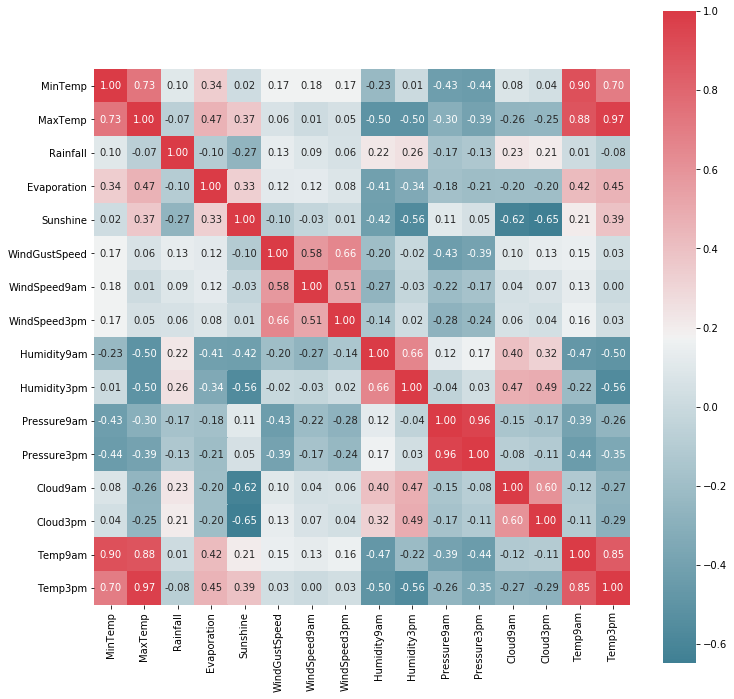

In [23]:
#HeatMap for plot on the correlation matrix using seaborn
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
ax = sns.heatmap(df_impute.corr(), cmap=cmap, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In this correlation matrix, we notice some strong to mid positive correlations. There are some negative correlations but those are not significant (i.e. Cloud vs pressure). The strongest correlations we notice are in temperature attributes - min vs max temperature, am vs pm temperature, and am vs pm cloud attributes. Other than those attrubutes, here are some of the other pairs of positive correlations we notice between attributes:
evaporation and sunshine, Windspeed 9am vs Windspeed 3pm, and himidity vs cloud (am/pm).  

/Users/ravisivaraman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



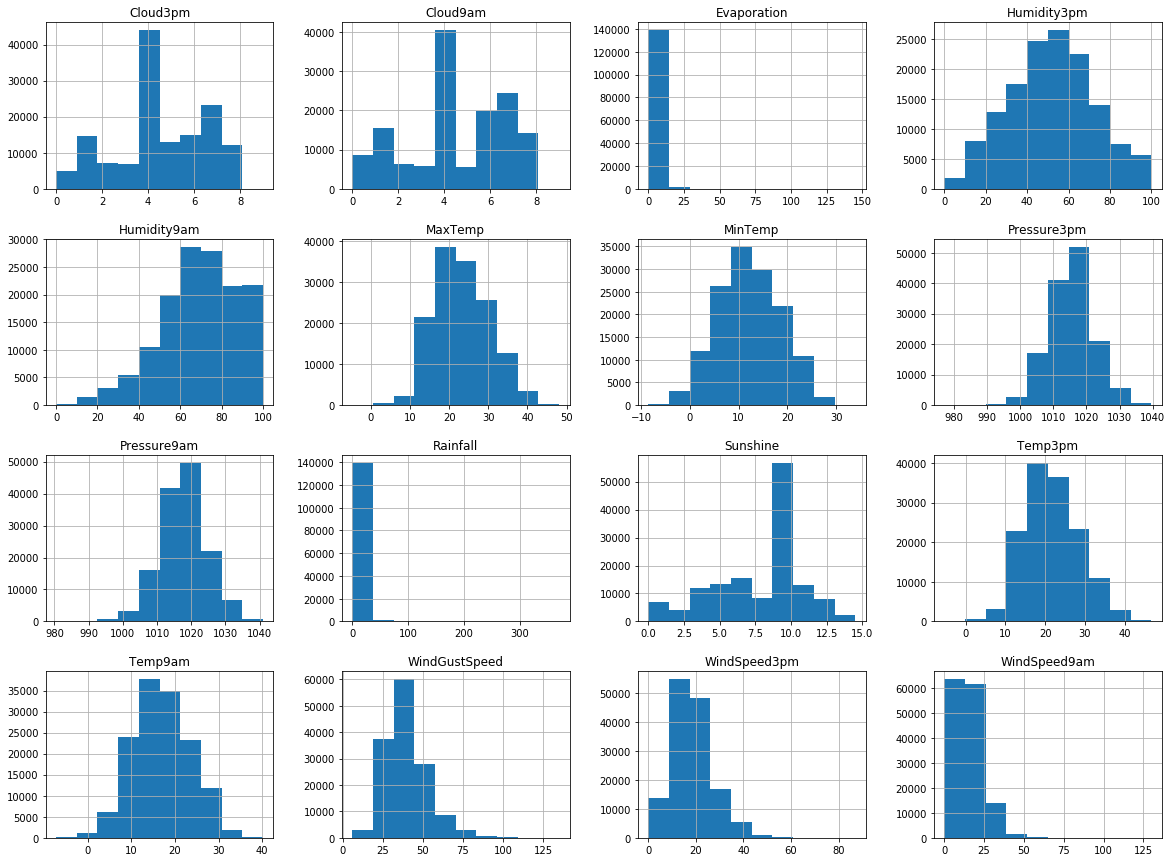

In [24]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_impute.hist(ax=ax)
plt.show()

#### Cross-Tabulation:

In [25]:
# RainToday By State (first one) and RainTomorrow by State (second one)
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir_RainToday = pd.crosstab(df3['State'], df3['RainToday'])
Location_Windir_RainToday.div(Location_Windir_RainToday.sum(1),axis=0).plot.barh(stacked = True)

Location_Windir_Raintomorrow = pd.crosstab(df3['State'], df3['RainTomorrow'])
Location_Windir_Raintomorrow.div(Location_Windir_Raintomorrow.sum(1),axis=0).plot.barh(stacked = True)

NameError: name 'df2' is not defined

Explain

In [ ]:
# WindDir By State
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir = pd.crosstab(df3['State'], df3['WindDir_main'])
Location_Windir.div(Location_Windir.sum(1),axis=0).plot.barh(stacked = True)


Explain

In [ ]:
groupby_single = df_impute.groupby(['State']).agg({'Rainfall': ['mean', 'min', 'max']})
groupby_single

In [ ]:
Explain

## 6.Explore Attributes and Class

In [ ]:
df_impute2 = df_impute

df_impute2['AvgTemp'] = df_impute2[['MinTemp', 'MaxTemp']].mean(axis=1)

#Rainfall Vs Different Temperature Attributes

# Line plot for the effect of wind direction on rainfall 
WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Minimum Temperature',
                         line_width=5.0,
                         )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Maximum Temperature',
                         line_width=5.0,
                        )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Average Temperature',
                         line_width=5.0,
                         )
             )

fig.update_layout(title='Rainfall vs Min/Max/Avg Temperature',
                  xaxis_title='Temperature [celsius]',
                  yaxis_title='Rainfall [mm]',
                  titlefont={'size': 28, 'family':'Serif'},
                  showlegend=True,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='#999999',
                  width=750, height=500,
                 )
fig.show()

# Reference: https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

Explain

In [ ]:
# Radar plot for differet temperature types on rainfall 
state = ['Australian Capital Territory','New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 
          'Tasmania', 'Victoria', 'Western Australia']

fig = go.Figure()

fig.add_trace(go.Barpolar(r=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Minimum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Maximum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Average Temperature'
                          )
             )

fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Rainfall vs Temperature',
                  titlefont={'size': 28, 'family':'Serif'},
                  template='plotly_dark',
                  paper_bgcolor='gray',
                  width=600, height=500,
                 )
fig.show()


# Reference: https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

Explain

In [ ]:
#Rainfall Vs Other Continuous Attributes 

sns.pairplot(df_impute[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm']])

Explain

## 7.New Features

   ### Added State a new feature

In [28]:
df_impute["Rainfall"].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

   ### Add rain amount as categorical (High, Medium, Low, None)

In [31]:
def rain_classifier(row):
    if row["Rainfall"] > 100:
        return "Heavy"
    elif row["Rainfall"] > 50 and row["Rainfall"] < 100:
        return "Medium"
    elif row["Rainfall"] > 1 and row["Rainfall"] < 50:
        return "Low"
    else:
        return "None"

In [32]:
df_impute["RainfallAmount"] = df.apply(rain_classifier, axis=1)

In [33]:
df_impute["RainfallAmount"]

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9          Low
10        None
11         Low
12         Low
13         Low
16        None
17         Low
18         Low
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29         Low
30        None
31        None
          ... 
145429    None
145430    None
145431    None
145432    None
145433    None
145434    None
145435    None
145436    None
145437    None
145438    None
145439    None
145440    None
145441    None
145442    None
145443    None
145444    None
145445    None
145446    None
145447    None
145448    None
145449    None
145450    None
145451    None
145452    None
145453    None
145454    None
145455    None
145456    None
145457    None
145458    None
Name: RainfallAmount, Length: 140787, dtype: object

## 8. Exceptional Work

In [ ]:
df_impute_num = df.columns[df.dtypes == 'float64']
df_impute_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

In [ ]:
X=df_impute[df_num]
y = df.RainTomorrow

In [ ]:
print('features shape:', X.shape) 
print('target shape:', y.shape )

In [ ]:
# PCA Code

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardizing the features
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 16)

principalComponents = pca.fit_transform(X)

principalDF = pd.DataFrame(data = principalComponents)

finalDF = pd.concat([principalDF, df[['RainTomorrow']]], axis =1)

plt.subplots(figsize=(6, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print('Cumulative Explained variance of components:',sum(pca.explained_variance_ratio_[0:199]) )
print(pca)


variation = pd.DataFrame(pca.explained_variance_ratio_)
print("Variation explained by each component:",variation)
# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
#Read the Government data for State and Latitude/Longitude lookup to create a geography dataframe for Weather Australia
worldcities = pd.read_excel("/Users/apurv/OneDrive - Southern Methodist University/SMU/7331 - Machine Learning 1/ML - Lab 1/Data set/worldcities.xlsx", sheet_name='Sheet1', header=[0])
worldcities = worldcities[(worldcities.country == "Australia")]
worldcities.rename(columns={'city': 'Location', 'lat': 'Latitude', 'lng': 'Longitude', 'admin_name': 'State'}, inplace=True)
worldcities = worldcities.drop(['city_ascii','country','iso2','iso3','capital','population','id'],axis=1)
df_impute_temp = df_impute
df_geo = pd.merge(df_impute_temp, worldcities, how="left", on=["Location"])
df_geo.head()


# Reference for World Cities data : https://simplemaps.com/data/world-cities

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_geo['Longitude'], y=df_geo['Latitude'])
plt.show()

In [ ]:
#import pandas as pd
# pip install shapely
# pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
aus = gpd.read_file("aust_cd66states.shp", SHAPE_RESTORE_SHX = 'YES')
geometry = [Point(xy) for xy in zip(df_geo['Longitude'], df_geo['Latitude'])]
gdf = GeoDataFrame(df_geo, geometry=geometry)
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=aus.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

# Reference for Australia shape file: http://data.daff.gov.au/anrdl/metadata_files/pa_nsaasr9nnd_02211a04.xml

In [ ]:
from mpl_toolkits.basemap import Basemap #conda install basemap
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
sites_lat_y = df_geo['Latitude'].tolist()
sites_lon_x = df_geo['Longitude'].tolist()
colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']
m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=500, c=colors, marker='o', alpha=1, edgecolor='k', linewidth=1)
plt.title('Basemap tutorial', fontsize=20)
plt.show()

In [ ]:
import plotly.express as px

components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = 4

fig = px.scatter_matrix(
    components,
    color=hotel_nol.is_canceled,
    dimensions=range(n_components),
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()